# Salary Prediction - Regression

## 1. Introduction

### 1.1 Objectives

- Utilize advanced machine learning techniques to predict employee salaries based on a variety of features such as experience, education level, age, gender, company size, and job level.
- Understand and quantify the impact of different factors on employee salary, providing insights into how various attributes influence compensation.
- Provide actionable insights to HR departments for structuring competitive and equitable salary packages, thereby aiding in talent acquisition and retention strategies.

### 1.2 Estimated Effects

- Enhanced Compensation Strategies: By accurately predicting salaries, organizations can develop more competitive compensation packages, ensuring they attract and retain top talent.
- Data-Driven HR Decisions: Understanding the key determinants of salary can help HR professionals make informed decisions about promotions, raises, and role adjustments.

### 1.3 Data Explanation
- Data Source: This dataset is sourced from Kaggle and can be accessed [here](https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor?select=glassdoor_jobs.csv).
- This dataset contains job postings from Glassdoor.com from 2017, featuring various attributes such as job positions, company size, and more. It can be used to analyze current trends in the job market based on these factors.


## 2. Data Preprocessing

### 2.1 Import Libraries and Load the dataset

In [1]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


# library for statistic
from scipy import stats
from scipy.stats import kruskal
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import kurtosis


# library for data preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler


# library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,  r2_score, mean_absolute_error
import shap


# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [3]:
random_state = 42

In [5]:
df = pd.read_csv("./Dataset/job_features.csv")

In [7]:
df.head()

Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters                    Size  Founded   Type of ownership  \
0      Goleta, CA   501 to 1000 employees     1973   Company - Private   
1   Baltimore, MD        10000+ employees     1984  Other Organization   
2  Clearwater, FL   501 to 1000 employees     2010   Company - Private   
3    Richland, WA  1001 to 5000 employees     1965          Government   
4    New York, NY     51 to 200 employees     1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  
0                                                 -1  
1                                                 -1  
2                                                 -1  
3  Oak Ridge National Laboratory, National Renewa...  
4               Commerce Signals, Cardlytics, Yodlee

### 2.2 Data Summary

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [12]:
df.isna().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [14]:
print("Duplicated rows: ", len(df[df.duplicated()]))

Duplicated rows:  0


In [16]:
# Check unique values of columns

for column in list(df.columns):
    print(column,":", df[column].nunique(), " ",df[column].unique())
    print()

Unnamed: 0 : 956   [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

### 2.3 Data Transforamtion

#### Change `-1` values to nan values and change dtype of numerical variables

In [20]:
def replace_negative_ones_with_nan(df):
    for col in df.columns:
        # Replace string '-1' with NaN
        df[col] = df[col].replace('-1', np.nan)
        # Replace numerical -1 with NaN
        df[col] = df[col].replace(-1, np.nan)
        # Convert to numeric if the column was numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].astype(float)
    return df

# Replace -1 values with NaN
df = replace_negative_ones_with_nan(df)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    float64
 1   Job Title          956 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             922 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       945 non-null    object 
 8   Size               945 non-null    object 
 9   Founded            859 non-null    float64
 10  Type of ownership  945 non-null    object 
 11  Industry           917 non-null    object 
 12  Sector             917 non-null    object 
 13  Revenue            945 non-null    object 
 14  Competitors        322 non-null    object 
dtypes: float64(3), object(12)
memory usage: 112.2+ KB


In [24]:
elements_to_convert = ['Rating', 'Founded']

for element in elements_to_convert:
    df[element] = pd.to_numeric(df[element], errors='coerce')

#### Remove ID Column

In [27]:
df= df.drop(columns = ['Unnamed: 0'])

#### Convert Specific Categorical Columns to Integer Representations

In [30]:
# Transform the specific columns to int datatype.

def extract_avg_value(value_str, value_type):
    if pd.isna(value_str):
        return np.nan
    if value_str == "Unknown / Non-Applicable" or value_str == "Unknown":
        return np.nan
    # Extract numeric ranges using regular expression
    value_range = re.findall(r'\d+', value_str)
    if len(value_range) == 1:
        return int(value_range[0])
    # Convert to integers
    low_value = int(value_range[0])
    high_value = int(value_range[1])
    # Calculate average value
    avg_value = (low_value + high_value) / 2
    return avg_value

df['avg_salary'] = df['Salary Estimate'].apply(lambda x: extract_avg_value(x, 'salary'))
df['avg_revenue'] = df['Revenue'].apply(lambda x: extract_avg_value(x, 'revenue'))
df['avg_size'] = df['Size'].apply(lambda x: extract_avg_value(x, 'size'))

In [32]:
# Change the Competitors to number of competitors

df['num_competitors'] = df['Competitors'].apply(lambda x: 0 if pd.isna(x) or x == '-1' else len(x.split(',')) if x else 0)
df['num_competitors'] = df['num_competitors'].astype('float64')


In [34]:
# Drop Original Columns

df = df.drop(columns = ['Salary Estimate', 'Revenue', 'Size', 'Competitors'])

In [36]:
df.head(2)

Job Title  \
0             Data Scientist   
1  Healthcare Data Scientist   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   

                                 Company Name         Location   Headquarters  \
0                      Tecolote Research\n3.8  Albuquerque, NM     Goleta, CA   
1  University of Maryland Medical System\n3.4    Linthicum, MD  Baltimore, MD   

   Founded   Type of ownership                          Industry  \
0   1973.0   Company - Private               Aerospace & Defense   
1   1984.0  Other Organization  Health Care Services & Hospitals   

                Sector  avg_salary  avg_revenue  avg_size  num_competitors  
0  Aerospace & Defense        72.0         75.0     750.5              0.0  
1          Health Care        87.5          3.5   10000.0              0.0

#### Create New Columns using Job Description Column

In [39]:
# Create new columns (python, excel) using Job Descriptino Columns

df['python'] = df['Job Description'].str.contains('python', case=False, na=False).astype(object)
df['excel'] = df['Job Description'].str.contains('excel', case=False, na=False).astype(object)
df['sql'] = df['Job Description'].str.contains('sql', case=False, na=False).astype(object)

df = df.drop(columns = ['Job Description'])

In [41]:
df.head(2)

Job Title  Rating  \
0             Data Scientist     3.8   
1  Healthcare Data Scientist     3.4   

                                 Company Name         Location   Headquarters  \
0                      Tecolote Research\n3.8  Albuquerque, NM     Goleta, CA   
1  University of Maryland Medical System\n3.4    Linthicum, MD  Baltimore, MD   

   Founded   Type of ownership                          Industry  \
0   1973.0   Company - Private               Aerospace & Defense   
1   1984.0  Other Organization  Health Care Services & Hospitals   

                Sector  avg_salary  avg_revenue  avg_size  num_competitors  \
0  Aerospace & Defense        72.0         75.0     750.5              0.0   
1          Health Care        87.5          3.5   10000.0              0.0   

  python  excel    sql  
0   True   True  False  
1   True  False  False

#### Create State Columns using Location

In [44]:
df['state_location'] = df['Location'].str.split(', ').str[-1]
df['state_headquarters'] = df['Headquarters'].str.split(', ').str[-1]

In [46]:
df = df.drop(columns = ['Location', 'Headquarters'])

#### Simplify Job Title

In [49]:
def simplify_job_title(title):
    if 'analyst' in title.lower():
        return 'Analyst'
    elif 'data scientist' in title.lower():
        return 'Data Scientist'
    elif 'engineer' in title.lower():
        return 'Engineer'
    elif 'scientist' in title.lower():
        return 'Other Scientist'
    else:
        return 'Others'

df['simple_job'] = df['Job Title'].apply(simplify_job_title)

In [51]:
df= df.drop(columns = ['Job Title'])

In [53]:
df['simple_job'].value_counts()

simple_job
Data Scientist     357
Engineer           197
Other Scientist    191
Analyst            126
Others              85
Name: count, dtype: int64

#### Remove Company Name

In [56]:
df['Company Name'] = df['Company Name'].str.replace(r'\n\d\.\d', '', regex=True)

In [58]:
df['Company Name'].nunique()

448

In [60]:
# Remove Company name because there are too many unique values
df = df.drop(columns = ['Company Name'])

#### Handling NA Values of dependent variable

In [63]:
# Check NA values. Remove or fill na values.

df.isna().sum()

Rating                 34
Founded                97
Type of ownership      11
Industry               39
Sector                 39
avg_salary            214
avg_revenue           310
avg_size               26
num_competitors         0
python                  0
excel                   0
sql                     0
state_location          0
state_headquarters     11
simple_job              0
dtype: int64

In [65]:
# Drop nan values of avg_salary (target column) and avg_size

df = df.dropna(subset=['avg_salary'])

In [67]:
# Drop avg_revenue column that have many nan values
elements_to_drop_na = ['avg_revenue']

#### Convert object column dtype to categorical

In [70]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

#### Check dataset after processing

In [73]:
df.head(3)

Rating  Founded   Type of ownership                          Industry  \
0     3.8   1973.0   Company - Private               Aerospace & Defense   
1     3.4   1984.0  Other Organization  Health Care Services & Hospitals   
2     4.8   2010.0   Company - Private                 Security Services   

                Sector  avg_salary  avg_revenue  avg_size  num_competitors  \
0  Aerospace & Defense        72.0         75.0     750.5              0.0   
1          Health Care        87.5          3.5   10000.0              0.0   
2    Business Services        85.0        300.0     750.5              0.0   

  python  excel    sql state_location state_headquarters      simple_job  
0   True   True  False             NM                 CA  Data Scientist  
1   True  False  False             MD                 MD  Data Scientist  
2   True   True   True             FL                 FL  Data Scientist

In [75]:
# Check dataset after processing

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 955
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Rating              731 non-null    float64 
 1   Founded             692 non-null    float64 
 2   Type of ownership   741 non-null    category
 3   Industry            732 non-null    category
 4   Sector              732 non-null    category
 5   avg_salary          742 non-null    float64 
 6   avg_revenue         538 non-null    float64 
 7   avg_size            732 non-null    float64 
 8   num_competitors     742 non-null    float64 
 9   python              742 non-null    category
 10  excel               742 non-null    category
 11  sql                 742 non-null    category
 12  state_location      742 non-null    category
 13  state_headquarters  741 non-null    category
 14  simple_job          742 non-null    category
dtypes: category(9), float64(6)
memory usage: 53.9

In [77]:
# Identify categorical, numerical, and target column

categorical_cols = list(df.select_dtypes(include=['category']).columns)
numeric_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
target_col = "avg_salary"

In [79]:
# Summary
print("number of rows: ", len(df))
print("number of columns: ", len(df.columns))
print("number of cateogorical variables: " , len(categorical_cols))
print("number of numerical variables: ", len(numeric_cols))

number of rows:  742
number of columns:  15
number of cateogorical variables:  9
number of numerical variables:  6


### Summary

1. Many values were set to -1, which were converted to NA values to better represent missing data.
2. Several columns contained string values, which are difficult to use directly for prediction. These columns (Job Title, Job Description, Salary Estimate, Location) were transformed into formats suitable for predictive modeling.
3. There are some NA values in the dataset that need to be addressed appropriately.

**Data Summary**
- Number of rows : 742

- Number of Variables : 15
    - numeric : 6
    - categorical : 9
- Number of Missing Cells : 214 (avg_salary)
- Number of Duplicated Rows : 0

## 3. EDA

### 3.1 Dependent Data Explore

<Axes: xlabel='avg_salary', ylabel='Count'>

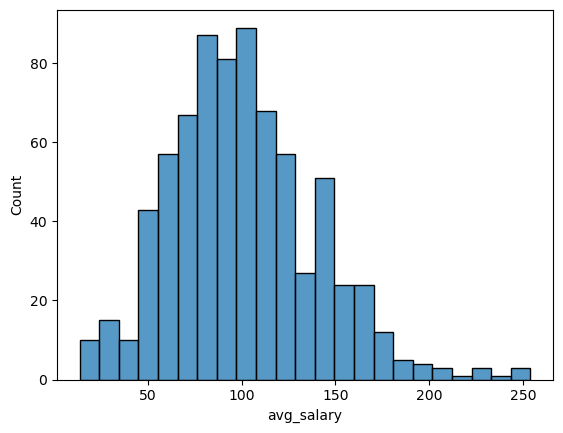

In [84]:
sns.histplot(data=df, x=target_col)

<Axes: xlabel='avg_salary'>

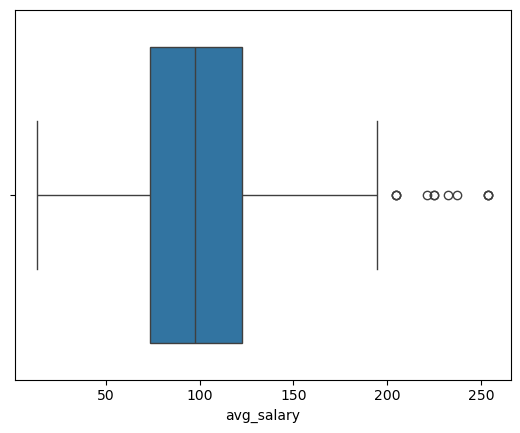

In [86]:
sns.boxplot(data=df, x=target_col)

In [88]:
df[target_col].describe()

count    742.000000
mean     100.626011
std       38.855948
min       13.500000
25%       73.500000
50%       97.500000
75%      122.500000
max      254.000000
Name: avg_salary, dtype: float64

In [90]:
kurtosis_value = kurtosis(df[target_col])
skewness_value = skew(df[target_col])

print(f'Kurtosis of target_col: {kurtosis_value}')
print(f'Skewness of target_col: {skewness_value}')

Kurtosis of target_col: 0.8751402222511344
Skewness of target_col: 0.6082408771156661


### 3.2 Independent Data Explore

#### 3.2.1 Categorical Columns

In [94]:
categorical_cols

['Type of ownership',
 'Industry',
 'Sector',
 'python',
 'excel',
 'sql',
 'state_location',
 'state_headquarters',
 'simple_job']

#### Explore relatinoship between target column and categorical variaebls

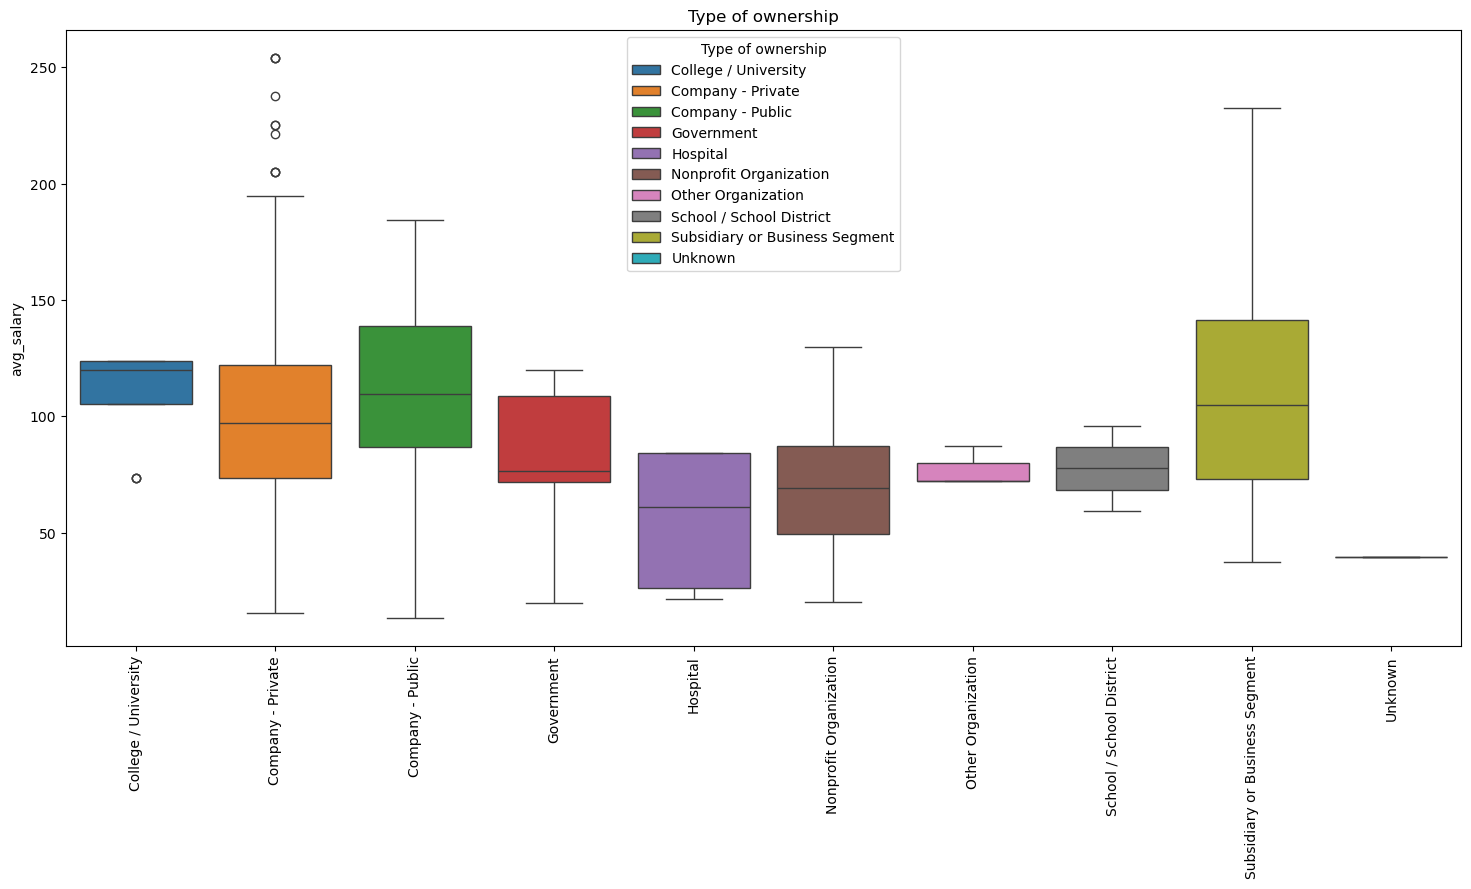

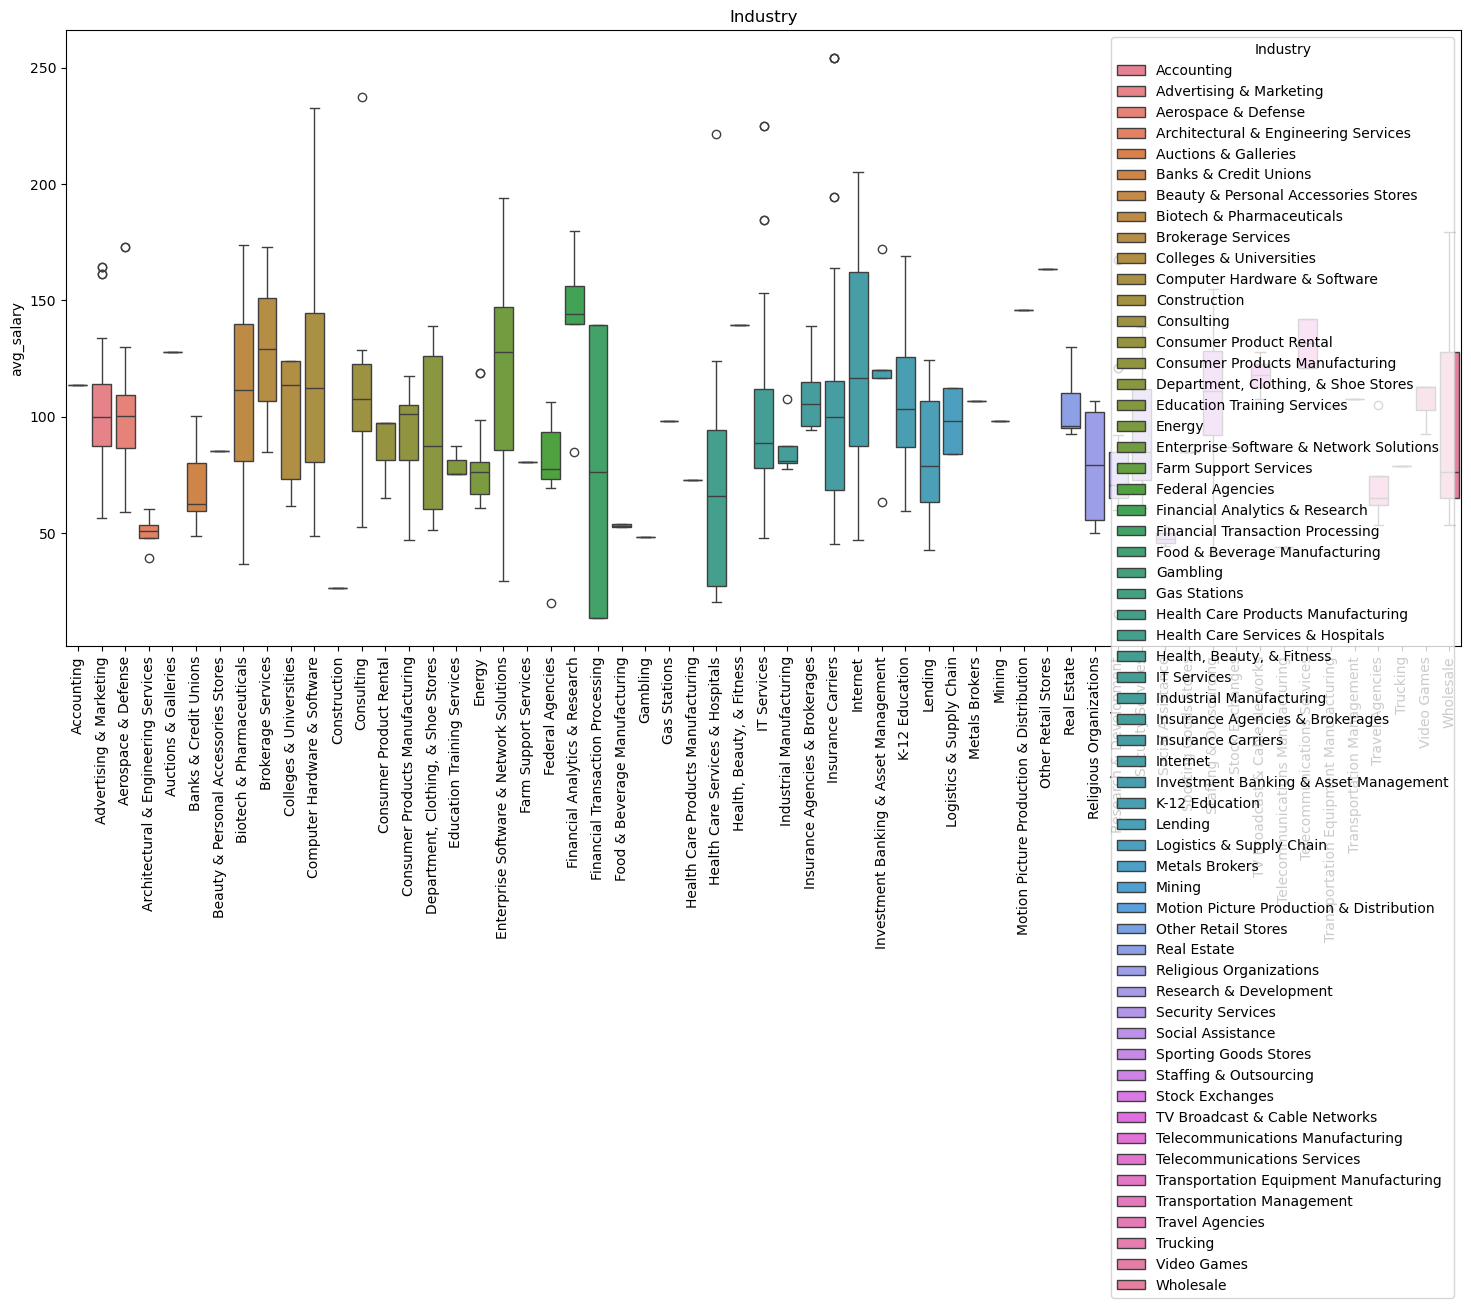

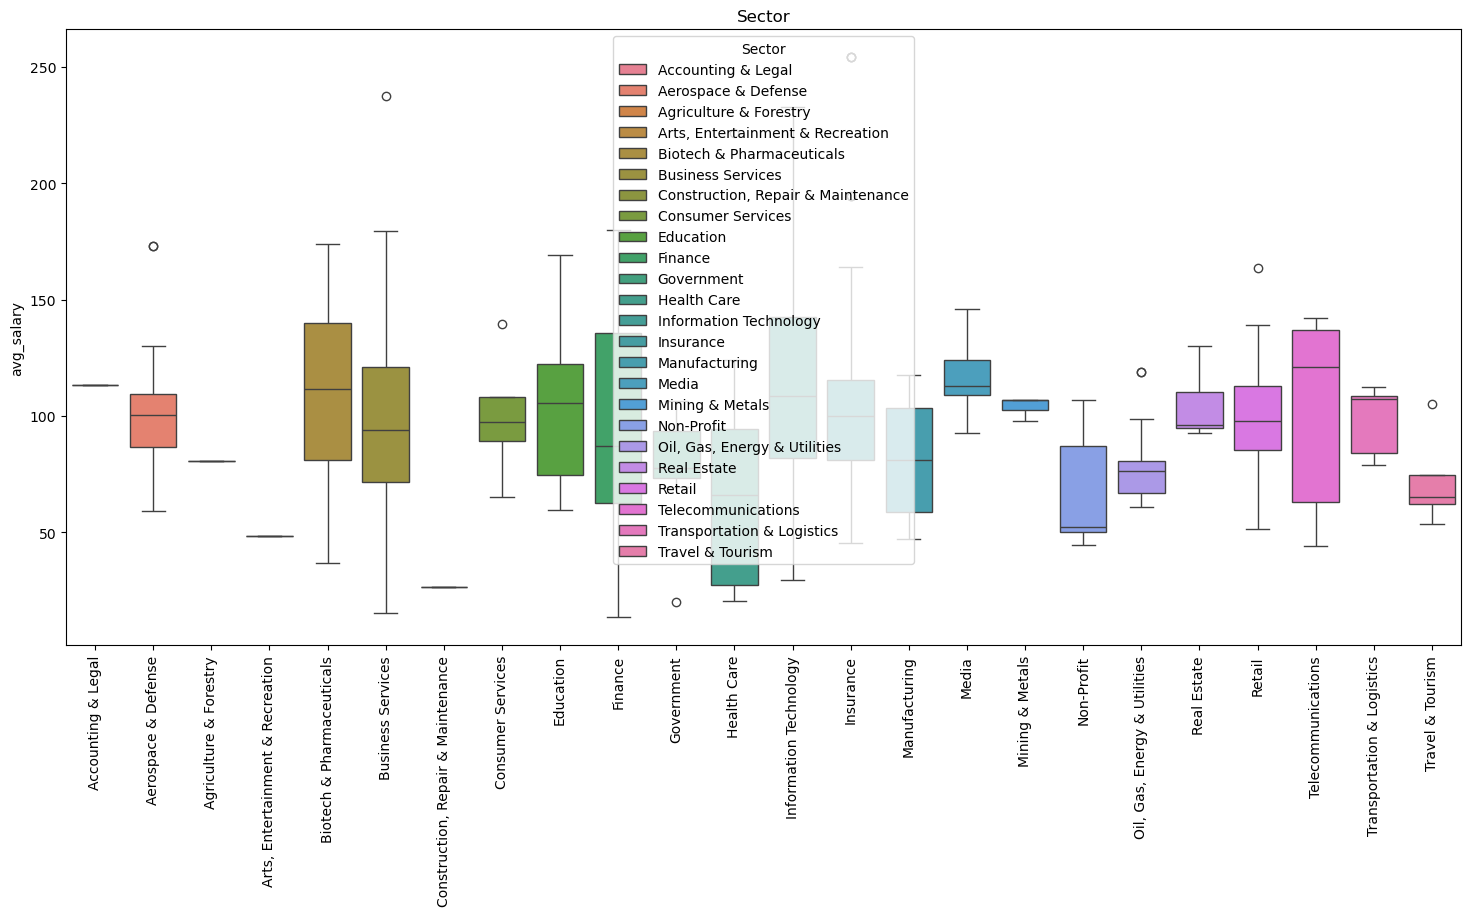

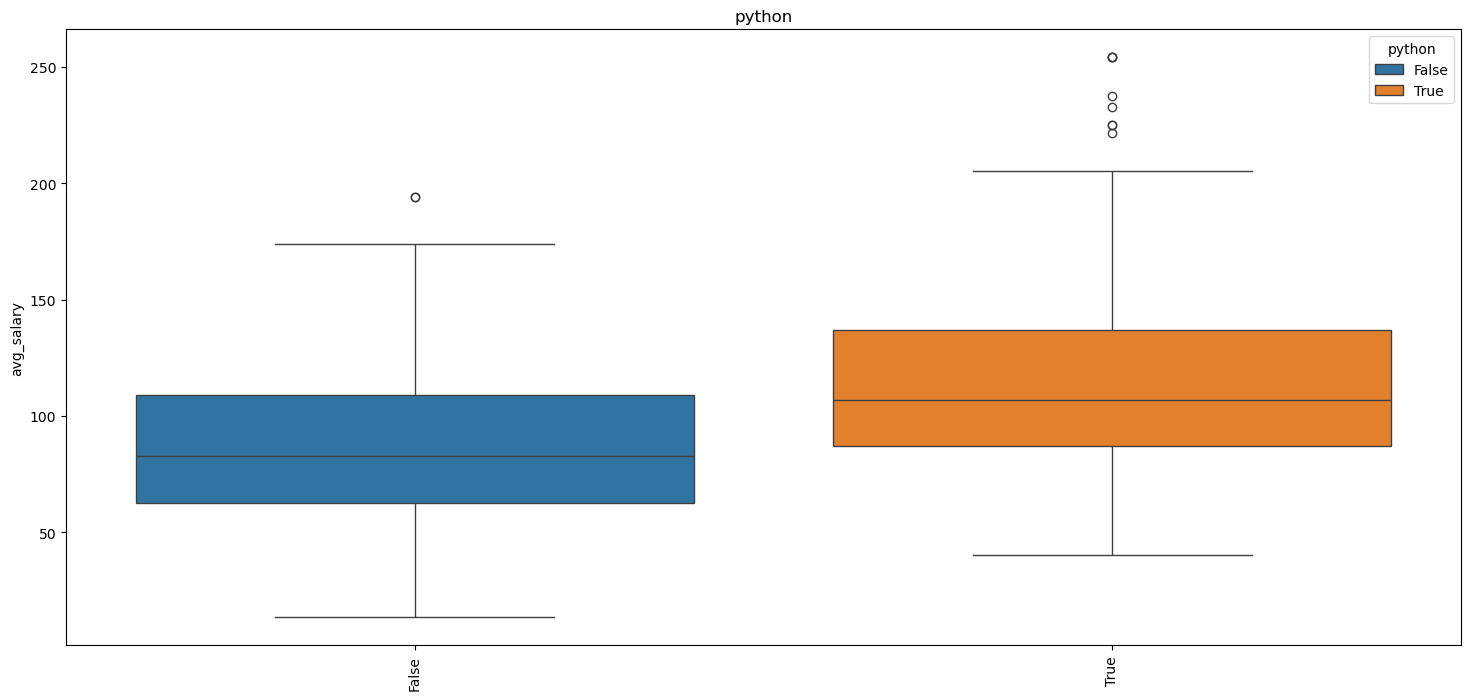

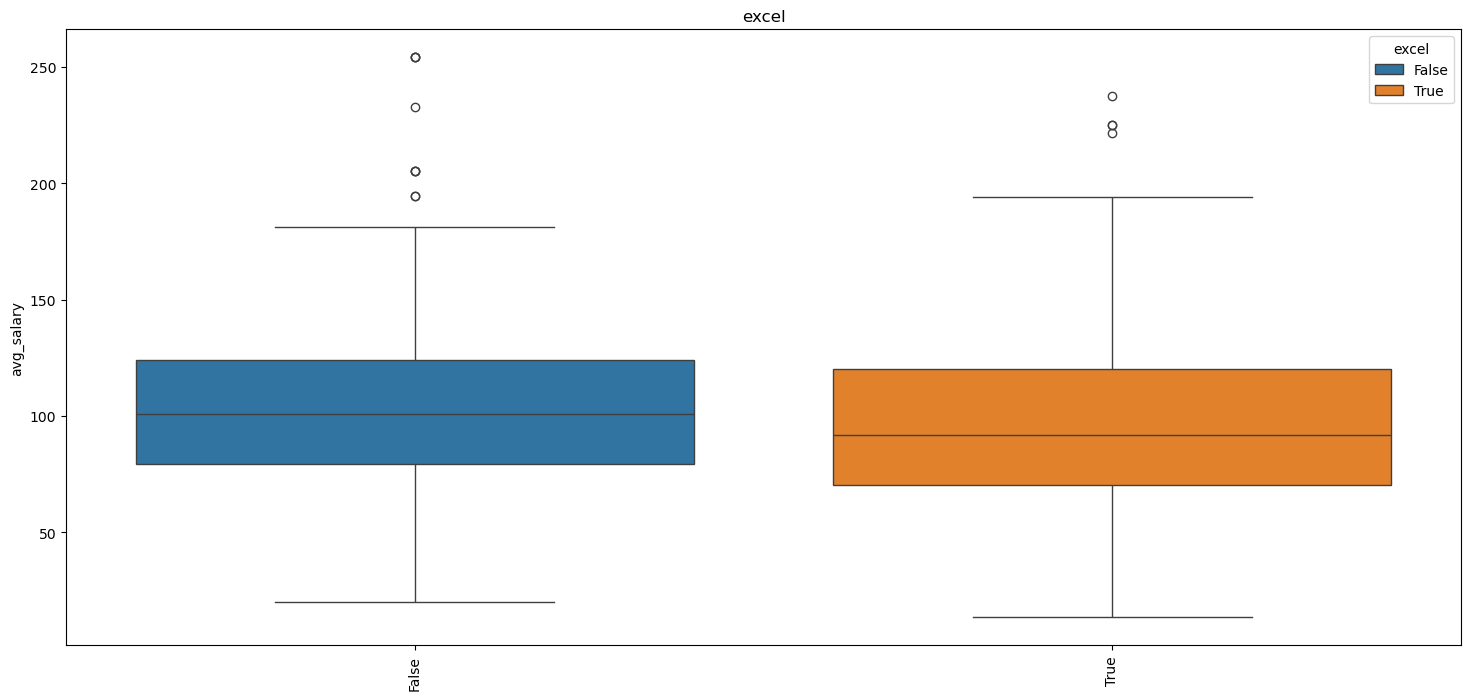

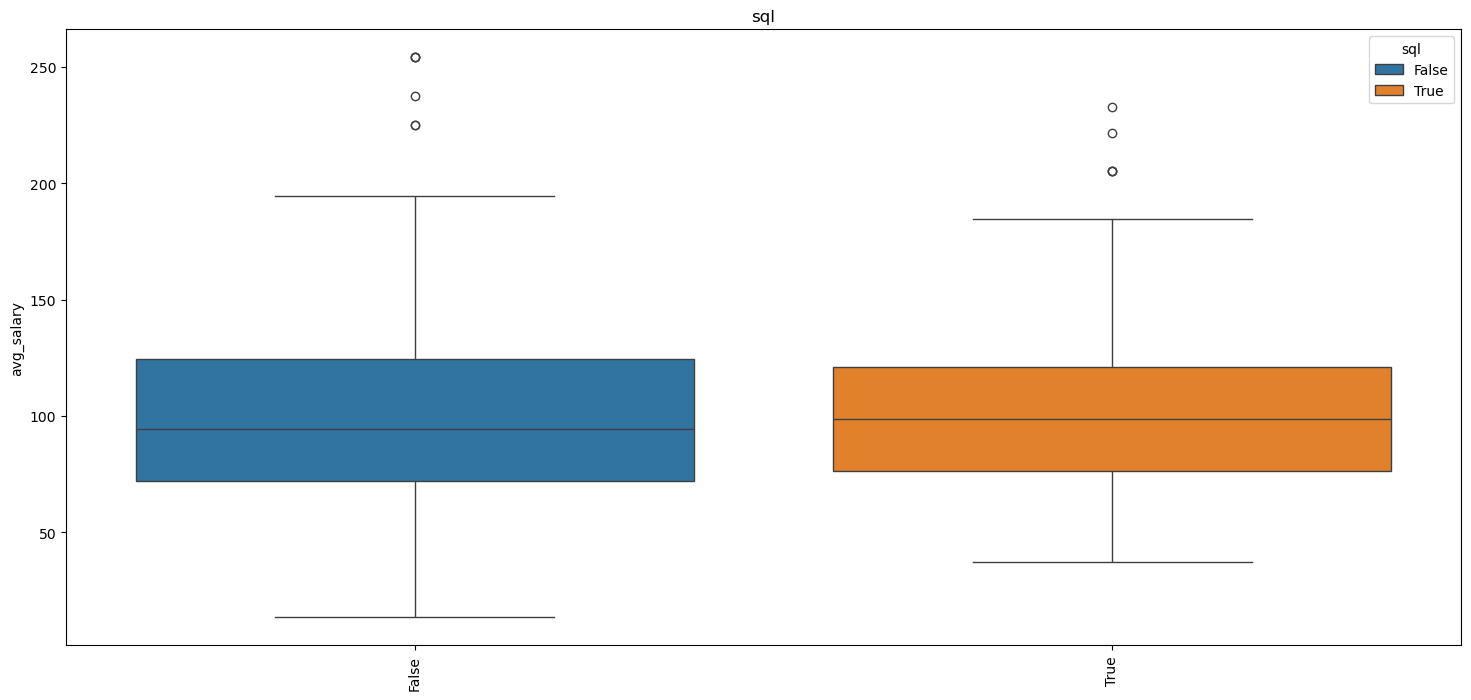

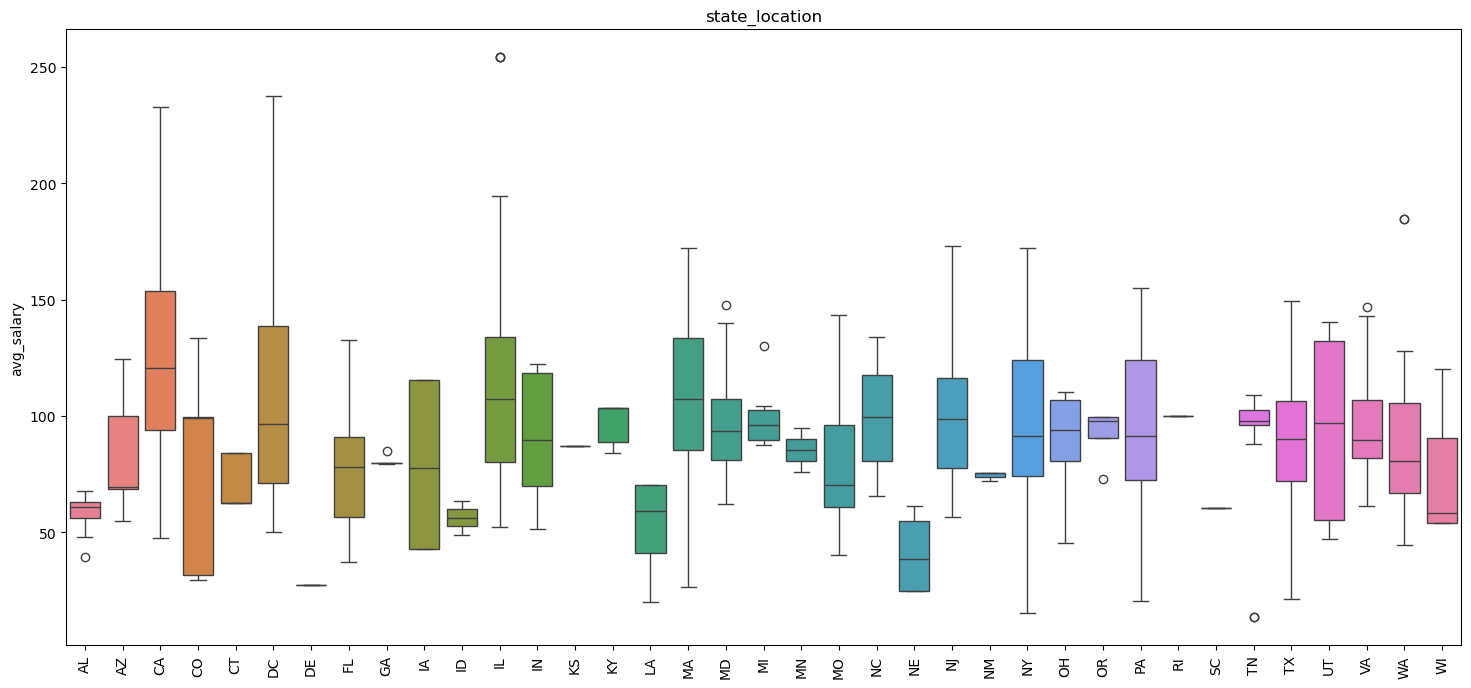

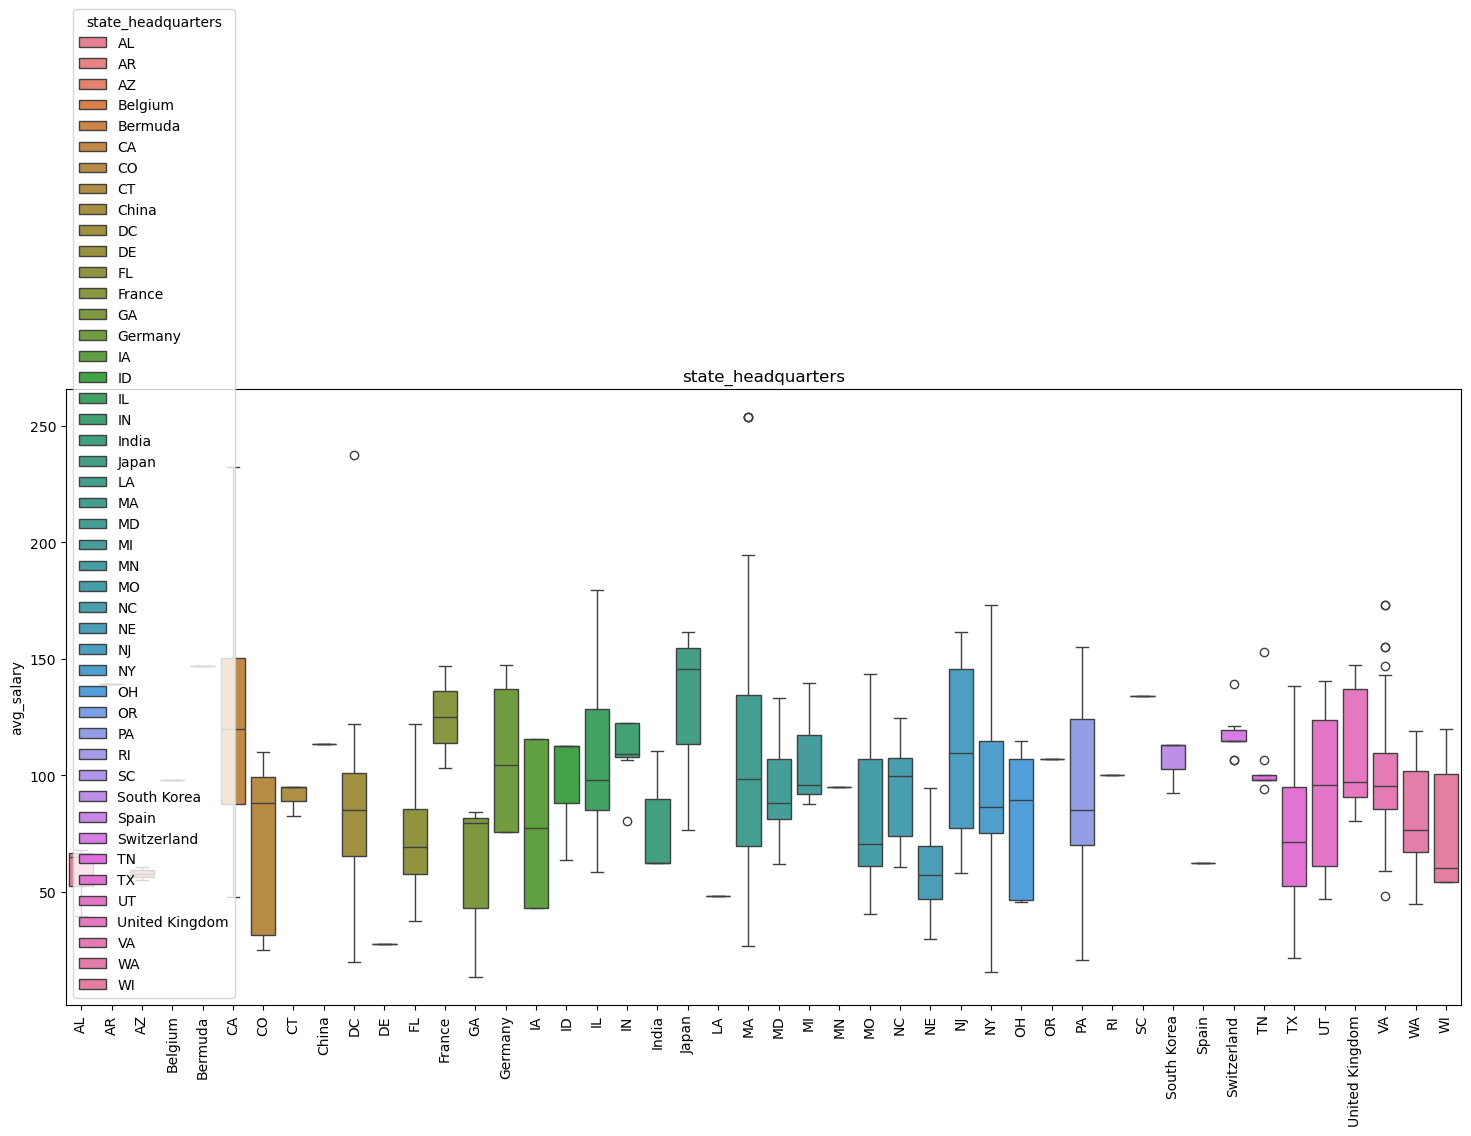

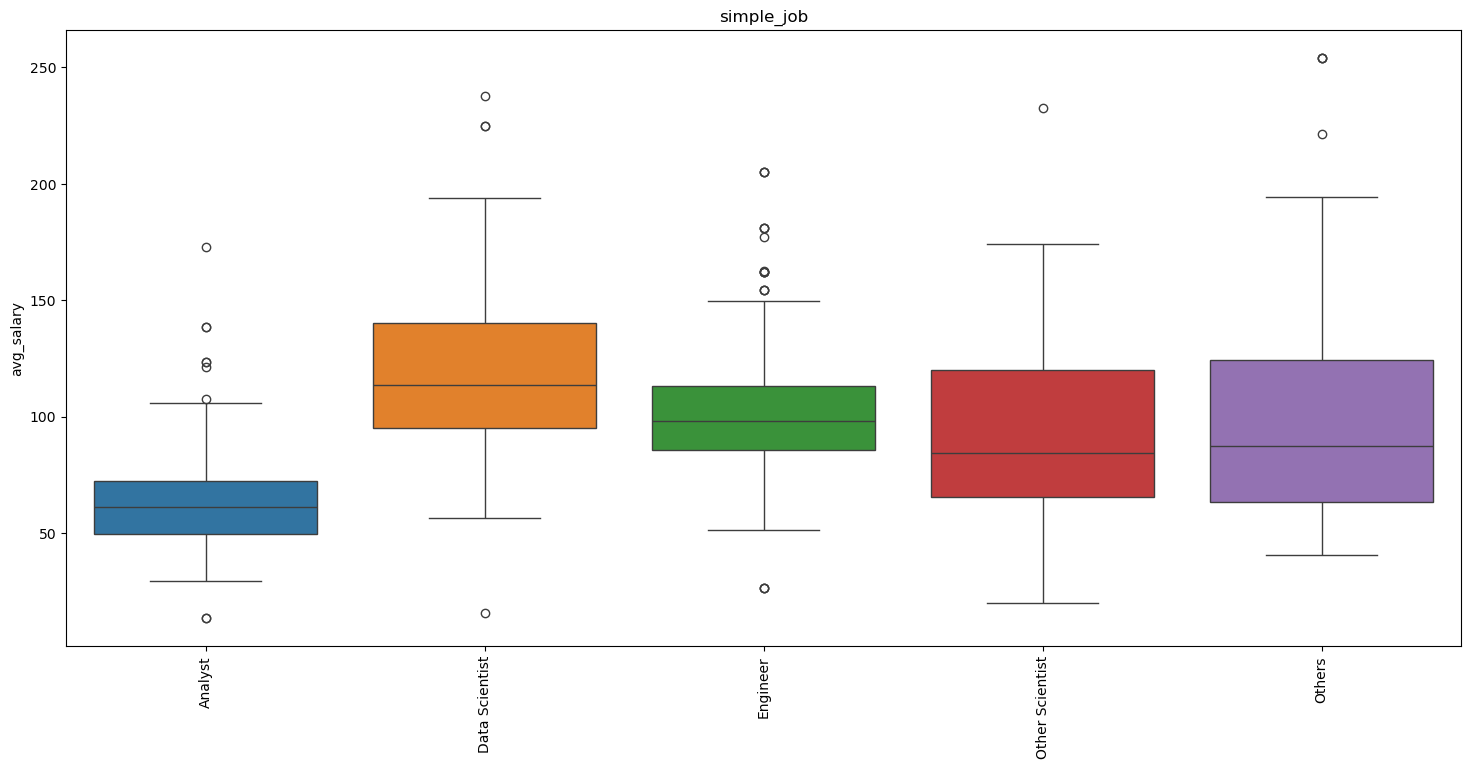

In [97]:
for col in categorical_cols:
    plt.figure(figsize=(18, 8))
    sns.boxplot(x=col, y=target_col, data=df, hue = col)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.show()

#### Statistical test to determine differences bewteen categorical variables and target variable

Check Normality

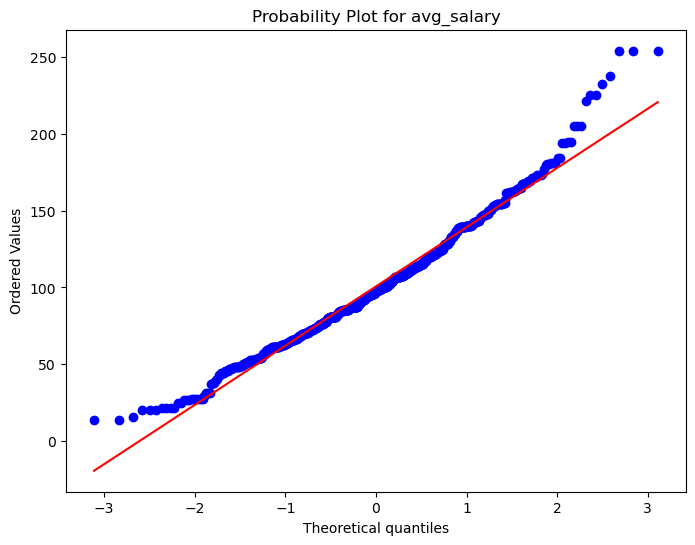

In [101]:
plt.figure(figsize=(8, 6))
stats.probplot(df[target_col], dist=stats.norm, plot=plt)
plt.title(f'Probability Plot for {target_col}')
plt.show()

In [103]:
shapiro_test = stats.shapiro(df[target_col])
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic: .4f}, p-value={shapiro_test.pvalue: .10f}')

Shapiro-Wilk Test: Statistic= 0.9782, p-value= 0.0000000045


Kruskal Wallis Test

In [106]:
selected_columns_by_kruskal = []
not_selected_by_kruskal = []

for col in categorical_cols:
    list_by_value = []
    for value in df[col].dropna().unique():
        df_tmp = df[df[col] == value][target_col].dropna()
        list_by_value.append(np.array(df_tmp))
    statistic, pvalue = kruskal(*list_by_value)
    if pvalue <= 0.05:
        selected_columns_by_kruskal.append(col)
    else:
        not_selected_by_kruskal.append(col)
    print(col, ", ",statistic,", ", pvalue)

print()
print("all categorical columns : ", len(categorical_cols))
print("selected columns by kruskal : ", len(selected_columns_by_kruskal), selected_columns_by_kruskal)
print("not selected columns by kruskal : ", len(not_selected_by_kruskal), not_selected_by_kruskal)

Type of ownership ,  89.46957501655442 ,  2.0800568683542834e-15
Industry ,  192.11513662678848 ,  2.8616100495678784e-16
Sector ,  110.02813140764822 ,  2.494255840821379e-13
python ,  81.24845394876638 ,  1.9905125267932928e-19
excel ,  4.226290985211034 ,  0.039802329364536114
sql ,  0.5854654715521964 ,  0.44417796923826514
state_location ,  139.11382529350828 ,  4.783021373741885e-14
state_headquarters ,  154.0594925758029 ,  7.44267352066381e-14
simple_job ,  189.59074220553217 ,  6.489899092618953e-40

all categorical columns :  9
selected columns by kruskal :  8 ['Type of ownership', 'Industry', 'Sector', 'python', 'excel', 'state_location', 'state_headquarters', 'simple_job']
not selected columns by kruskal :  1 ['sql']


#### 3.2.2 Numerical Columns

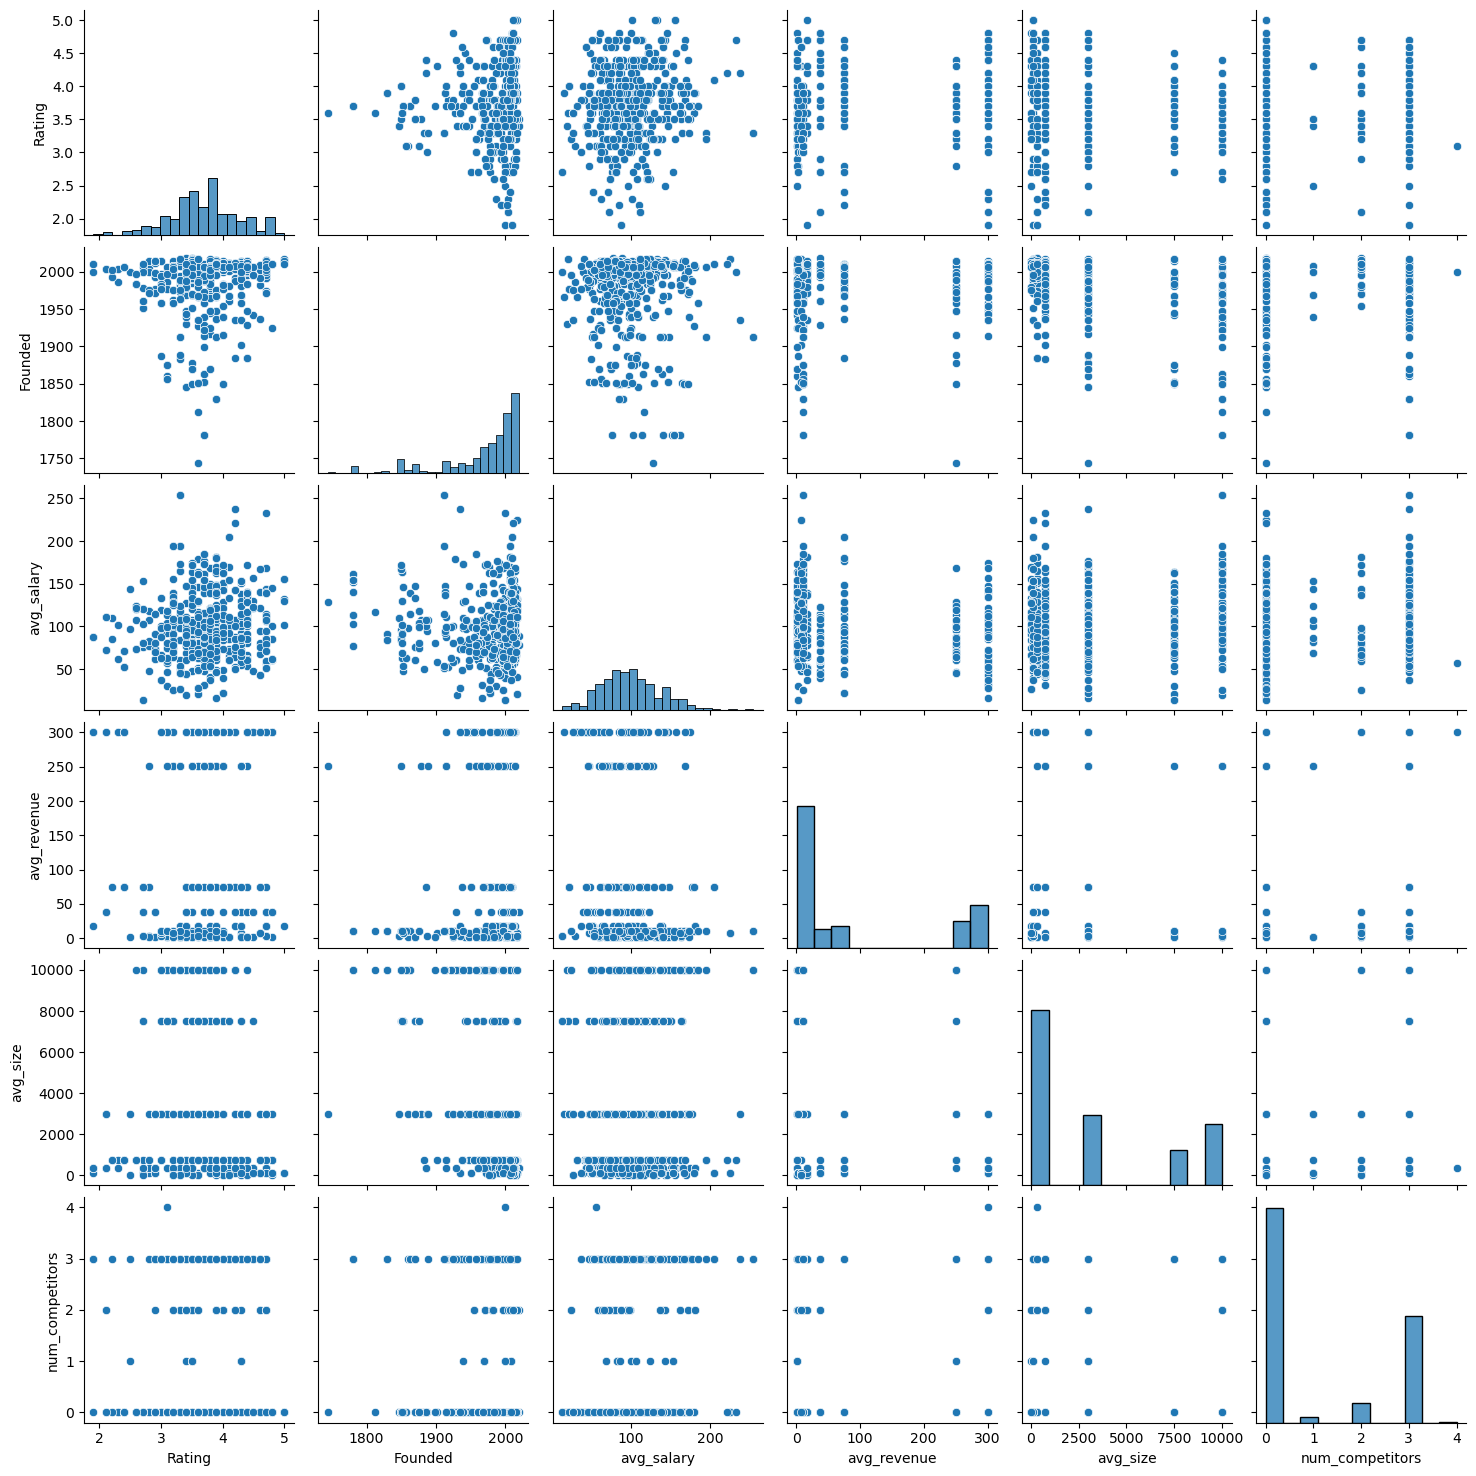

In [109]:
sns.pairplot(data=df.loc[:,numeric_cols])

<Axes: >

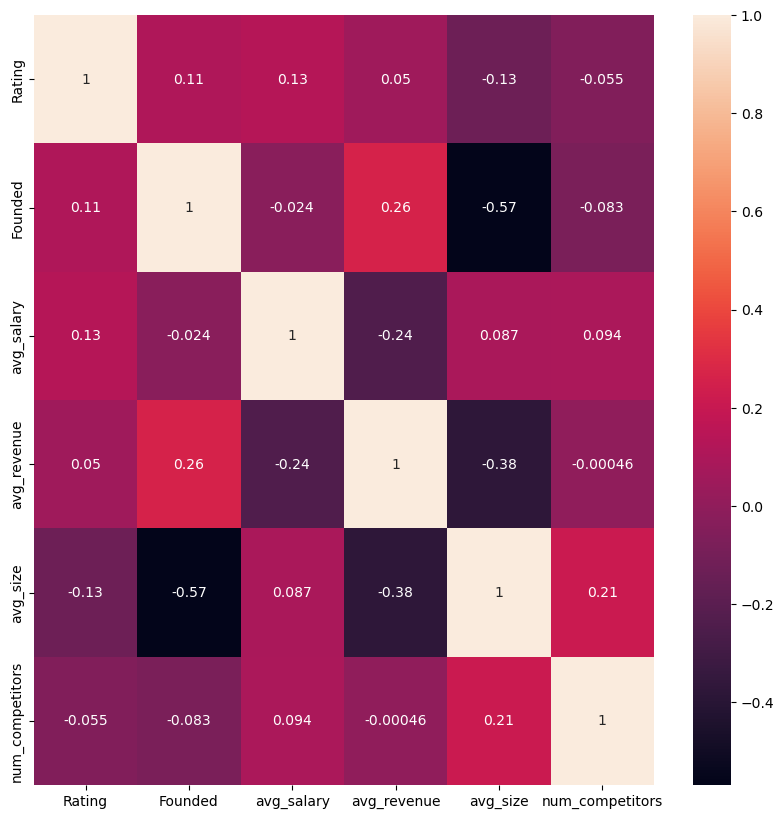

In [110]:
df_corr = df.loc[:,numeric_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True)

In [111]:
df_cleaned = df.dropna()

def caculate_vif(df_target):
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(df_target.values, i) for i in range(df_target.shape[1])]
    vif["Feature"] = df_target.columns
    return vif


In [112]:
caculate_vif(df_cleaned[numeric_cols]).sort_values(by = "VIF", ascending = False)

VIF          Feature
1  59.890241          Founded
0  53.826491           Rating
2   8.295509       avg_salary
4   2.700101         avg_size
3   1.982894      avg_revenue
5   1.918525  num_competitors

In [113]:
caculate_vif(df_cleaned[numeric_cols].drop("Founded", axis=1)).sort_values(by = "VIF", ascending = False)

VIF          Feature
0  9.477088           Rating
1  8.061912       avg_salary
3  2.557489         avg_size
2  1.897958      avg_revenue
4  1.889091  num_competitors

In [115]:
elements_to_drop_by_vif = ["Founded"]

### Summary

- Based on the probability plot and Shapiro test, the target column is not normally distributed. Therefore, tests that do not assume normality, such as the Kruskal-Wallis test, should be used instead of ANOVA.
- The Kruskal-Wallis test indicates that the sql column is not related to the target column, suggesting it should be removed from the analysis.
- According to the correlation heat map and VIF score, the Founded column exhibits high multicollinearity and should be removed to avoid redundancy and improve model performance.


## 4. Feature Engineering and Feature Selection

### 4.1 Feature Selection

In [124]:
elements_to_drop = set(elements_to_drop_by_vif + elements_to_drop_na)

final_columns = list(set(selected_columns_by_kruskal + numeric_cols + [target_col]))
final_columns = [col for col in final_columns if col not in elements_to_drop]

# Create the final DataFrame
df_final = df[final_columns]
df_final = df_final.dropna()


In [126]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 955
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   excel               728 non-null    category
 1   state_headquarters  728 non-null    category
 2   python              728 non-null    category
 3   Rating              728 non-null    float64 
 4   avg_salary          728 non-null    float64 
 5   Industry            728 non-null    category
 6   avg_size            728 non-null    float64 
 7   Type of ownership   728 non-null    category
 8   state_location      728 non-null    category
 9   simple_job          728 non-null    category
 10  num_competitors     728 non-null    float64 
 11  Sector              728 non-null    category
dtypes: category(8), float64(4)
memory usage: 40.9 KB


In [128]:
df_final.head()

excel state_headquarters python  Rating  avg_salary  \
0   True                 CA   True     3.8        72.0   
1  False                 MD   True     3.4        87.5   
2   True                 FL   True     4.8        85.0   
3  False                 WA   True     3.8        76.5   
4   True                 NY   True     2.9       114.5   

                           Industry  avg_size   Type of ownership  \
0               Aerospace & Defense     750.5   Company - Private   
1  Health Care Services & Hospitals   10000.0  Other Organization   
2                 Security Services     750.5   Company - Private   
3                            Energy    3000.5          Government   
4           Advertising & Marketing     125.5   Company - Private   

  state_location      simple_job  num_competitors  \
0             NM  Data Scientist              0.0   
1             MD  Data Scientist              0.0   
2             FL  Data Scientist              0.0   
3             WA  Data Scientist              3.0   
4             NY  Data Scientist              3.0   

                         Sector  
0           Aerospace & Defense  
1                   Health Care  
2             Business Services  
3  Oil, Gas, Energy & Utilities  
4             Business Services

### 4.2 Feature Engineering

#### Encdoing and Scaling

In [132]:
# # Separate features and target

X = df_final.drop(columns=[target_col])
y = df_final[target_col]

In [134]:
# Identify categorical and numerical columns

categorical_cols = X.select_dtypes(include=['category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int', 'float64']).columns.tolist()

In [136]:
# Minimax Scaling

minmax_scaler = MinMaxScaler()
X.loc[:, numerical_cols] = minmax_scaler.fit_transform(X[numerical_cols])

In [138]:
# One-Hot Encoding

X = pd.get_dummies(X)

bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

X.head()

Rating  avg_size  num_competitors  excel_False  excel_True  \
0  0.612903  0.072685             0.00            0           1   
1  0.483871  1.000000             0.00            1           0   
2  0.935484  0.072685             0.00            0           1   
3  0.612903  0.298261             0.75            1           0   
4  0.322581  0.010026             0.75            0           1   

   state_headquarters_AL  state_headquarters_AR  state_headquarters_AZ  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   state_headquarters_Belgium  state_headquarters_Bermuda  ...  \
0                           0                           0  ...   
1                           0                           0  ...   
2                           0                           0  ...   
3                           0                           0  ...   
4                           0                           0  ...   

   Sector_Manufacturing  Sector_Media  Sector_Mining & Metals  \
0                     0             0                       0   
1                     0             0                       0   
2                     0             0                       0   
3                     0             0                       0   
4                     0             0                       0   

   Sector_Non-Profit  Sector_Oil, Gas, Energy & Utilities  Sector_Real Estate  \
0                  0                                    0                   0   
1                  0                                    0                   0   
2                  0                                    0                   0   
3                  0                                    1                   0   
4                  0                                    0                   0   

   Sector_Retail  Sector_Telecommunications  \
0              0                          0   
1              0                          0   
2              0                          0   
3              0                          0   
4              0                          0   

   Sector_Transportation & Logistics  Sector_Travel & Tourism  
0                                  0                        0  
1                                  0                        0  
2                                  0                        0  
3                                  0                        0  
4                                  0                        0  

[5 rows x 188 columns]

### Summary

- Selected the features tested from the previous section.
- Conducted one-hot encoding and Min-Max scaling.

## 5. Model Training

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)

### 5.1 Base Model

In [145]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=random_state),
    "Random Forest": RandomForestRegressor(random_state=random_state),
    "SVR": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=random_state),
    "Lasso Regression": Lasso(random_state=random_state),
    "Ridge Regression": Ridge(random_state=random_state),
    "XGBoost": XGBRegressor(random_state=random_state)

}

# Store the results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store the results
    results[name] = {"MSE": mse, "RMSE": rmse,"MAE": mae,"R2": r2}

In [146]:
# Print the results in a DataFrame
pd.options.display.float_format = '{:.3f}'.format
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="MSE")
print(results_df)

                       MSE   RMSE    MAE    R2
Random Forest      468.527 21.645 13.151 0.696
XGBoost            559.200 23.647 14.026 0.637
Gradient Boosting  767.329 27.701 20.007 0.502
Ridge Regression   828.320 28.781 20.615 0.462
Decision Tree      873.228 29.550 14.742 0.433
Lasso Regression  1061.837 32.586 24.051 0.310
SVR               1286.600 35.869 26.081 0.164


### 5.2 Hyperparameter Tuning by GridSearch

In [150]:
param_grids = {
    "Random Forest": {
        'n_estimators': [100, 150, 200],
        'max_depth': [None, 1, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 3, 5],
        'max_features': [None, 'sqrt', 'log2']
    },
    "Gradient Boosting": {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.2, 0.1, 0.05, 0.01],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'subsample': [1.0, 0.8, 0.6]
    },
    "XGBoost": {
        'n_estimators': [100, 150, 200],
        'learning_rate': [0.2, 0.1, 0.05, 0.01],
        'max_depth': [3, 5, 7],
        'subsample': [1.0, 0.8, 0.6],
        'colsample_bytree': [1.0, 0.8, 0.6]
    },
    "Decision Tree": {
        'max_depth': [None, 1, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 3, 5],
        'max_features': [None, 'sqrt', 'log2']
    }
}

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=random_state),
    "Gradient Boosting": GradientBoostingRegressor(random_state=random_state),
    "XGBoost": XGBRegressor(random_state=random_state),
    "Decision Tree": DecisionTreeRegressor(random_state=random_state)
}

# Store the results
results = {}

# Train and evaluate each model with grid search
for name, model in models.items():
    print(f"Starting grid search for {name}...")
    
    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], 
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store the results
    results[name] = {
        "Best Parameters": grid_search.best_params_,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }


Starting grid search for Random Forest...
Starting grid search for Gradient Boosting...
Starting grid search for XGBoost...
Starting grid search for Decision Tree...


In [151]:
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"  Best Parameters: {metrics['Best Parameters']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  RMSE: {metrics['RMSE']}")
    print(f"  R2: {metrics['R2']}\n")

Results for Random Forest:
  Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
  MSE: 474.0088431897631
  RMSE: 21.77174414670913
  R2: 0.692057727616715

Results for Gradient Boosting:
  Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.6}
  MSE: 500.9193525620202
  RMSE: 22.381227682189827
  R2: 0.6745751773939821

Results for XGBoost:
  Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
  MSE: 517.5410306884007
  RMSE: 22.749528142104413
  R2: 0.663776819079363

Results for Decision Tree:
  Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
  MSE: 974.8711082572299
  RMSE: 31.222926004095612
  R2: 0.3666699921938795



In [152]:
pd.options.display.float_format = '{:.3f}'.format
results_df = pd.DataFrame(results).T
results_df = results_df.drop(columns=["Best Parameters"])
results_df = results_df.sort_values(by="MSE")

print(results_df)

                      MSE   RMSE    MAE    R2
Random Forest     474.009 21.772 13.791 0.692
Gradient Boosting 500.919 22.381 13.424 0.675
XGBoost           517.541 22.750 12.785 0.664
Decision Tree     974.871 31.223 19.266 0.367


### Summary

- Random Forest, XGBoost, and Decision Tree showed the best scores without any hyperparameter tuning.
- Hyperparameter tuning improved the score of Gradient Boosting but decreased the score of Random Forest.
- Random Forest demonstrated the highest performance overall.


#### Model Performance Summary

**Base Models**

| Model              | MSE     | RMSE   | MAE    | R²    |
|--------------------|---------|--------|--------|-------|
| Random Forest      | 468.527 | 21.645 | 13.151 | 0.696 |
| XGBoost            | 559.200 | 23.647 | 14.026 | 0.637 |
| Gradient Boosting  | 767.329 | 27.701 | 20.007 | 0.502 |
| Ridge Regression   | 828.320 | 28.781 | 20.615 | 0.462 |
| Decision Tree      | 873.228 | 29.550 | 14.742 | 0.433 |
| Lasso Regression   | 1061.837| 32.586 | 24.051 | 0.310 |
| SVR                | 1286.600| 35.869 | 26.081 | 0.164 |

**Models Trained with GridSearch**
| Model             | MSE     | RMSE   | MAE    | R²    |
|-------------------|---------|--------|--------|-------|
| Random Forest     | 474.009 | 21.772 | 13.791 | 0.692 |
| Gradient Boosting | 500.919 | 22.381 | 13.424 | 0.675 |
| XGBoost           | 517.541 | 22.750 | 12.785 | 0.664 |
| Decision Tree     | 974.871 | 31.223 | 19.266 | 0.367 |

## 6. Model Analysis

In [158]:
regr = RandomForestRegressor(random_state=random_state)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

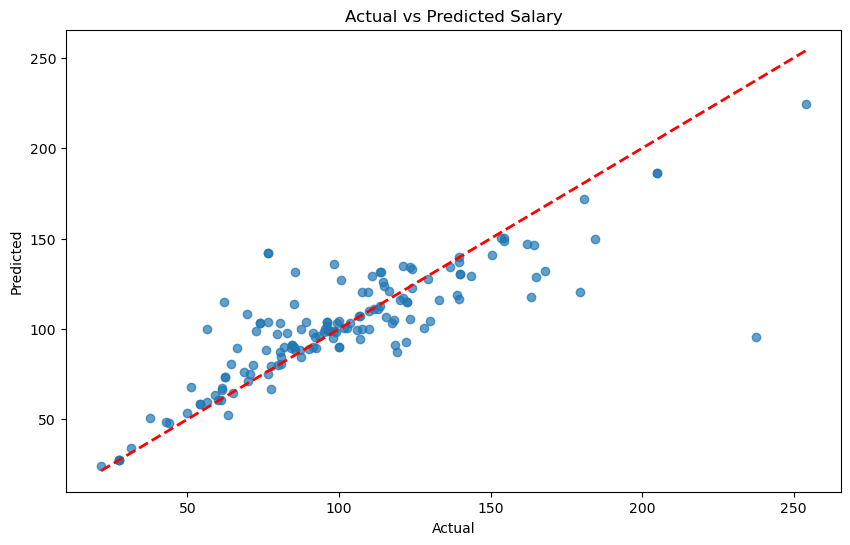

In [160]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Salary')
plt.show()

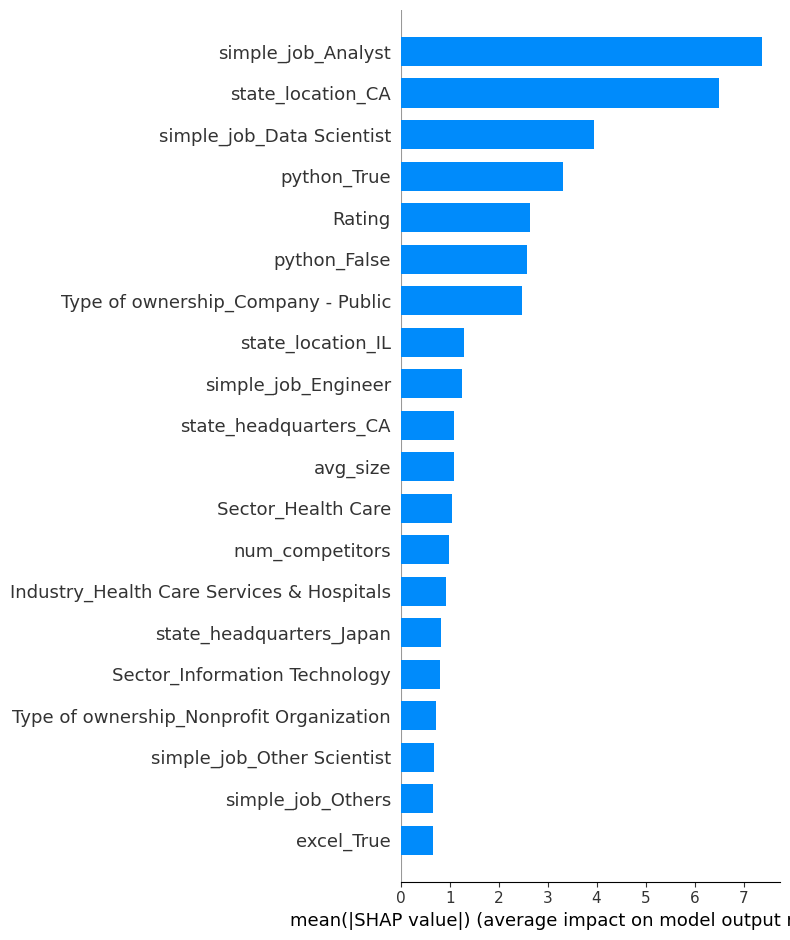

In [164]:
explainer = shap.TreeExplainer(regr)

# Calculate SHAP values for the test set with check_additivity=False
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Plot the summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

plt.show()

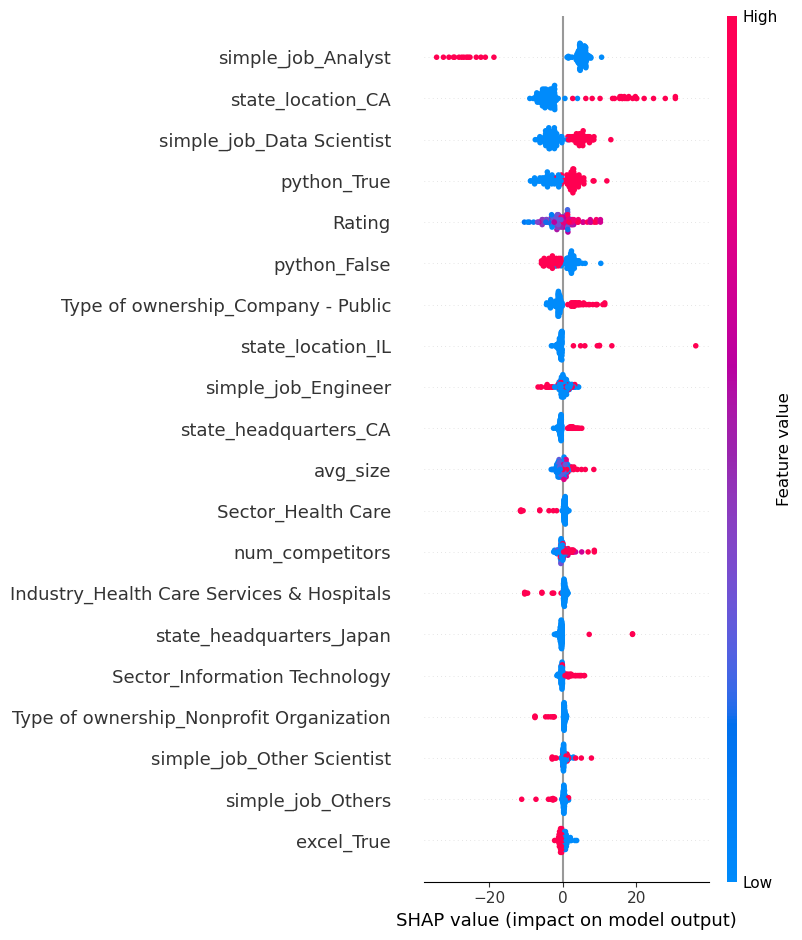

In [165]:
# Plot the SHAP values for each feature
shap.summary_plot(shap_values, X_test)

plt.show()

### Summary

- The role of an analyst negatively affects the salary.
- A company's location in California (CA) is associated with a high salary and has high feature importance.
- The use of Python and the type of job are important factors influencing salary.

## 7. Findings, Recommendations, Limitations

**Key Findings**

- Location Importance: A company's location in California (CA) is associated with higher salaries, highlighting the importance of geographic location in salary determination.
- Skill Relevance: The use of Python is a significant factor in salary prediction, suggesting that proficiency in Python is highly valued in the job market.
- Job Type Influence: The type of job plays a crucial role in determining salary, with certain job types commanding higher salaries than others.

**Recommendations**

- Job-Based Salary Adjustments: Consider conducting a market analysis to adjust salaries for analyst roles to ensure competitive compensation that attracts and retains talent.
- Skill Development Programs: Invest in training programs that enhance employees' proficiency in Python and other high-demand skills to increase their market value and salary potential.


**Limitations**
- Data Granularity: The dataset may lack detailed information about specific job responsibilities and qualifications, which could provide more accurate salary predictions.
- Hyperparameter Tuning: A broader exploration of hyperparameters during model training could improve the performance of the salary prediction model, indicating that the current model may not be fully optimized.
- Sample Representation: The dataset might not fully represent all industries or regions, leading to potential biases in salary predictions and limiting the generalizability of the findings.